# Análise de intenção de votos dos presidenciáveis 2018

Segundo o [IBOPE](http://www.ibopeinteligencia.com/noticias-e-pesquisas/lula-lidera-disputa-para-2018-bolsonaro-e-marina-empatam-na-maioria-dos-cenarios/), os principais pré-candidatos de 2018 seriam:
 * Luis Inácio da Silva (Lula)
 * Jair Bolsonaro
 * Geraldo Alckimin
 * João Dória
 * Marina Silva
 * Ciro Gomes

***A partir da análise de dados do facebook, vamos entender os assuntos relacionados a alguns dos principais candidatos, bem como suas reações.***

![Candidatos](https://img.estadao.com.br/resources/jpg/2/4/1502712078742.jpg)

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import nltk
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
warnings.filterwarnings("ignore", 'A value is trying to be set on a copy of a slice from a DataFrame')


In [10]:
#Reading Data
face= pd.read_csv('C:/Users/VMTREINAMENTO/Downloads/DatasetFacebook.csv', delimiter=';', encoding = "ISO-8859-1")
face.head()

,SRC,METHOD,FROM,ID,RELATIONSHIP,DATE,MENTION,REACTIONS,LIKE,LOVE,WOW,HAHA,SAD,ANGRY,THANKFUL,PRIDE,TOTAL COMMENT,SHARE,RANDON
0,ad.alvarodias,POST,ad.alvarodias,199599520097304_1810872098970030,ad.alvarodias,2018-02-27T21:32:00+0000,Você acha que a criação do Ministério da Segur...,798,696,2,1,6,22,71,0,0,583,153,"0,107205556"
1,ad.alvarodias,COMMENT,NaN,1810872098970030_1810890865634820,199599520097304_1810872098970030,2018-02-27T21:34:52+0000,Não adianta ministério e este não funcionar co...,71,70,1,0,0,0,0,0,0,7,0,"0,968696314"
2,ad.alvarodias,REPLY,NaN,1810872098970030_1810945125629394,1810872098970030_1810890865634820,2018-02-27T22:55:02+0000,Parabéns pelo comentário,2,2,0,0,0,0,0,0,0,0,0,"0,099476575"
3,ad.alvarodias,REPLY,NaN,1810872098970030_1811078895616017,1810872098970030_1810890865634820,2018-02-28T02:11:51+0000,Falou tudo ??????,1,1,0,0,0,0,0,0,0,0,0,"0,277738496"
4,ad.alvarodias,REPLY,NaN,1810872098970030_1811483528908887,1810872098970030_1810890865634820,2018-02-28T12:22:59+0000,"sou do Rio, Senador. Concordo com que o Código...",0,0,0,0,0,0,0,0,0,0,0,"0,474025374"


#### Exploração do DataSet

In [343]:
print('Registros por Método:\n\n',face.groupby('METHOD').count().ID.sort_values(), '\n')
print('Registros por Source:\n\n',face.groupby('SRC').count().ID.sort_values(ascending=False)[0:10], '\n')
print('Reações por post de Fonte:\n\n')
face[face['METHOD'] == 'POST'].groupby('SRC').sum().loc[:,'REACTIONS':'PRIDE' ].sort_values('REACTIONS',ascending=False)[0:10]


Registros por Método:

 METHOD
POST         5741
REPLY       50114
COMMENT    100433
Name: ID, dtype: int64 

Registros por Source:

 SRC
gauchazh             7638
UOL                  7241
g1                   6911
estadao              5423
Veja                 5151
jornaloglobo         5101
Brasil247            4949
jornalextra          4525
diariocatarinense    4234
Exame                4044
Name: ID, dtype: int64 

Reações por post de Fonte:




,REACTIONS,LIKE,LOVE,WOW,HAHA,SAD,ANGRY,THANKFUL,PRIDE
SRC,,,,,,,,,
g1,209651,143790,6685,15587,18846,14918,9825,0,0
UOL,147627,119647,2440,8282,8363,5972,2923,0,0
mblivre,144808,114112,3051,949,13002,548,13146,0,0
jairmessias.bolsonaro,75248,68360,4406,349,132,104,1897,0,0
Veja,74769,58528,3580,1817,5482,1886,3476,0,0
Exame,73251,60583,4273,4556,1982,482,1375,0,0
gauchazh,70841,54919,3468,2524,7802,752,1376,0,0
jornalextra,67584,47272,5546,2487,7318,1454,3507,0,0
jairbolsonaropresidente2018Oficial,54815,49272,2499,249,1662,224,909,0,0



Duas páginas páginas relacionadas ao pré-candidato ***Jair Bolsonaro*** estão entre as 10 páginas com maior número de reações.

No entanto, existem outras páginas no dataset que podem apresentar conteúdos que não são necessariamente relacionados aos pré-candidatos. Essas interações possivelmente não conterão informações muito relevantes acerca dos candidatos, ao menos para essa análise simples.

In [126]:
g1_interacoes = face.loc[(face.SRC == 'g1') & (face.METHOD == 'POST'), 'MENTION']
interacoes = [np.random.randint(0,len(g1_interacoes.index)) for x in range(0,20) ]
for interacao in interacoes:
    print ('Interação '+ str(g1_interacoes.index[interacao]) + ':', g1_interacoes[g1_interacoes.index[interacao]], '\n')


Interação 116148: Intervenção no RJ, Nuzman, PIB, Libertadores e mais... https://glo.bo/2ozMuWf #G1 #agendadodia 

Interação 113322: Aparelho que causou espanto ao ser usado na franquia de filmes volta com 4G e jogo da cobrinha ==> https://glo.bo/2Cmb32l #G1 

Interação 111136: Essa frase é de um agente penitenciário do PR, que aponta a falta de efetivo e superlotação das celas como problemas principais do seu trabalho ==> https://glo.bo/2EMz2JG #G1 #MonitorDaViolência 

Interação 116980: Confira o que aconteceu de mais importante e também as histórias mais interessantes do dia #G1 https://glo.bo/2EZkGle #G1 

Interação 112207: Qualquer cidadão poderá ver salários e auxílios recebidos ==> https://glo.bo/2CKZP38 #G1 

Interação 116500: Considerado o maior traficante de fuzis para o Brasil, Frederik Barbieri foi preso nos EUA no sábado (24) https://glo.bo/2GJsJ68 #G1 

Interação 115001: Era o meu sonho ==> https://glo.bo/2HQevSe #G1 

Interação 110608: Mulher teve ataque de fúria quando 

Devemos então procurar por interações que tenham um conteúdo mais claro em relação aos pré-candidatos e eleições ou nas páginas que estejam diretamente ligas aos candidados (e.g., oCiroGomes). Go to Regex!

In [344]:
termos = '([Mm]arina\s?([Ss]ilva)?)|'                                                   # Marina Silva
termos += '(([Ll]ula)|((Luis\sIn[aá]cio\s)(Lula)?(da\sSilva)?)|([Ee]x-[Pp]residente))|' # Lula
termos += '((Jair\s)?[Bb]olsonaro.*?)|'                                                 # Bolsonaro
termos += '(([Cc]iro)\s?(Gomes))|'                                                      # Ciro Gomes
termos += '((Jo[aã]o)?\s?([Dd][óo]ria))|'                                               # João Dória
termos += '([aA]lvaro\s?[Dd]ias)|'                                                      # Álvaro dias
termos += '(([Gg]eraldo)?\s?(Alcki?min))|'                                              # Geraldo Alckmin
termos += '(([Ee]lei[cç][oõ]es\s?2018)|(#eleicoes2018))'                                # #eleicoes2018
termos = '(' + termos + ')'
precandidatos = re.compile(termos)
interacoes_candidatos = face.SRC.str.contains(precandidatos) | face.MENTION.str.contains(precandidatos)
face_candidatos = face.loc[interacoes_candidatos,]
print ('Total de interações citando os candidatos: ', fontes_candidatos.sum() )

Total de interações citando os candidatos:  17159


Quando avaliamos somente as interações citando os candidatos, vemos que o número de interações reduz drasticamente. No entanto, utilizaremos esse novo dataset para entender os assuntos que orbitam ao redor dos pré-candidatos e o "sentimento" contido nessas afirmações.

Novamente vamos ver algumas informações das páginas que citam os candidatos.

In [345]:
print('Principais páginas e suas respectivas reações citando os candidatos:')
top10_reacoes=face_candidatos.groupby('SRC').sum().loc[:,'REACTIONS':'PRIDE' ].sort_values('REACTIONS',ascending=False)[0:10]

top10_reacoes['LIKE']     = round( (top10_reacoes['LIKE'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['LOVE']     = round( (top10_reacoes['LOVE'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['WOW']      = round( (top10_reacoes['WOW'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['HAHA']     = round( (top10_reacoes['HAHA'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['SAD']      = round( (top10_reacoes['SAD'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['ANGRY']    = round( (top10_reacoes['ANGRY'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['THANKFUL'] = round( (top10_reacoes['THANKFUL'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes

Principais páginas e suas respectivas reações citando os candidatos:


,REACTIONS,LIKE,LOVE,WOW,HAHA,SAD,ANGRY,THANKFUL,PRIDE
SRC,,,,,,,,,
jairmessias.bolsonaro,81988,0.910,0.057,0.004,0.004,0.001,0.023,0.0,0
jairbolsonaropresidente2018Oficial,58705,0.900,0.044,0.004,0.032,0.004,0.016,0.0,0
marinasilva.oficial,32796,0.593,0.149,0.054,0.188,0.003,0.014,0.0,0
ad.alvarodias,28714,0.923,0.037,0.009,0.013,0.005,0.014,0.0,0
bolsonaros2,27078,0.915,0.040,0.002,0.031,0.001,0.011,0.0,0
SomostodosJairMessiasBolsonaro,23096,0.727,0.019,0.004,0.246,0.001,0.004,0.0,0
TimeCiroGomes,14494,0.690,0.043,0.009,0.254,0.001,0.003,0.0,0
oCiroGomes,11106,0.855,0.006,0.024,0.045,0.017,0.054,0.0,0
jairomessiasbolsonaro,8295,0.877,0.081,0.009,0.025,0.001,0.007,0.0,0


Vamos ver alguns dos comentários dessas menções aos candidatos ou das páginas dos candidatos:

In [302]:
mencoes = [np.random.randint(0,len(face_candidatos.index)) for x in range(0,5) ]
for mencao in mencoes:
    print ('Interação '+ str(face_candidatos.index[mencao]) + ' da página '+ face_candidatos.loc[face_candidatos.index[mencao],'SRC'] + ':',  
           face_candidatos.loc[face_candidatos.index[mencao], 'MENTION'], '\n')


Interação 12882 da página marinasilva.oficial: ONDE É QUE VC REPRESENTA, RENOVAÇÃO????É OUTRA PIADISTA!!!!! 

Interação 1074 da página ad.alvarodias: Avante, avante Senador Alvaro Dias. Contamos com sua liderança e objetivos. 

Interação 7110 da página bolsonaros2: Eu também kkkk 

Interação 155595 da página ad.alvarodias: Precisa recuperar o rombo nos fundos de pensão, que prejudicou milhares de pessoas... 

Interação 36979 da página soubhevoce: A globo perdeu o Lula né, e o narigudo deles viu que ia passar vergonha e saiu fora, agora aparecem com essa aí, se ela desistir entra um ex bbb 



Vamos ter uma ideia mais visual das reações das páginas por candidato.

<img src="https://en.facebookbrand.com/wp-content/uploads/2016/09/reactions_12_2017.png" height="100px;" width="400px;"/>

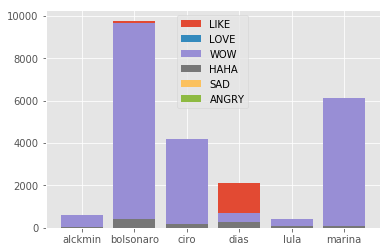

In [429]:
marina    ='([Mm]arina\s?([Ss]ilva)?)'                                                   # Marina Silva
lula      ='(([Ll]ula)|((Luis\sIn[aá]cio\s)(Lula)?(da\sSilva)?)|([Ee]x-[Pp]residente))' # Lula
bolsonaro ='((Jair\s)?[Bb]olsonaro.*?)'                                                 # Bolsonaro
ciro      ='(([Cc]iro)\s?(Gomes))'                                                      # Ciro Gomes
doria     ='((Jo[aã]o)?\s?([Dd][óo]ria))'                                               # João Dória
dias      ='([aA]lvaro\s?[Dd]ias)'                                                      # Álvaro dias
alckmin   ='(([Gg]eraldo)?\s?(Alcki?min))'                                              # Geraldo Alckmin

df_marina    = pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(marina) ])
df_marina['Candidato'] = 'marina'
df_lula      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(lula) ])
df_lula['Candidato'] = 'lula'
df_bolsonaro =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(bolsonaro)])
df_bolsonaro['Candidato'] = 'bolsonaro'
df_ciro      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(ciro) ])
df_ciro['Candidato'] ='ciro'
df_doria     =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(doria)])
df_doria['Candidato'] ='doria'
df_dias      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(dias)])
df_dias['Candidato']='dias'
df_alckmin   =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(alckmin)])
df_alckmin['Candidato'] = 'alckmin'
dfs = [df_alckmin, df_ciro,df_bolsonaro,df_dias,df_dias,df_doria,df_lula,df_marina]
dfs = pd.concat(dfs)
dfs = dfs.groupby('Candidato', axis=0).sum()
love    = plt.bar(dfs.index,'LOVE', data=dfs )
wow     = plt.bar(dfs.index,'WOW', data=dfs )
haha    = plt.bar(dfs.index, 'HAHA', data=dfs)
sad     = plt.bar(dfs.index, 'SAD', data=dfs)
thankful= plt.bar(dfs.index, 'THANKFUL', data=dfs)
pride   = plt.bar(dfs.index, 'PRIDE', data=dfs)
plt.legend(dfs.columns[dfs.columns!='REACTIONS'])

In [289]:
dface.loc[(face.SRC == 'g1') & (face.MENTION.str.contains('(Bolsonaro)')), 'MENTION']

110109    Bolsonaro vem aí! Vai acabar com essas indicaç...
110564    Chaves na globo. E agora, quem poderá nos ajud...
110960    Leia a Matéria eleitor do Bolsonaro ignorante !!!
111007    Nojo de alguns comentários! !!!   Racismo semp...
111027           Eleitor Racista do Bolsonaro detectado !!!
111037           Eleitor Racista do Bolsonaro detectado !!!
111137    Fica tranquilo Dihego Cardoso, caso Bolsonaro ...
111138    Os mama jato tem uma raiva do cão de Bolsonaro...
111157    Bolsonaro não liga se vc faz amor de costas, f...
111158    Vc vai poder socializar sua bunda no governo d...
111203    Kkkk, Sim! Bolsonaro2018. Já pode ir pra Cuba....
112158    Alguém me enviou esse excelente comentário:Tod...
112472                             Vixi! Bolsonaro Evil kkk
112672                       Ele quer ser vice do Bolsonaro
112748    Alguém me enviou esse excelente comentário:Tod...
113025                            Bolsonaro  resolve kkkkkk
113083    Quem fala mal do Lula são todo

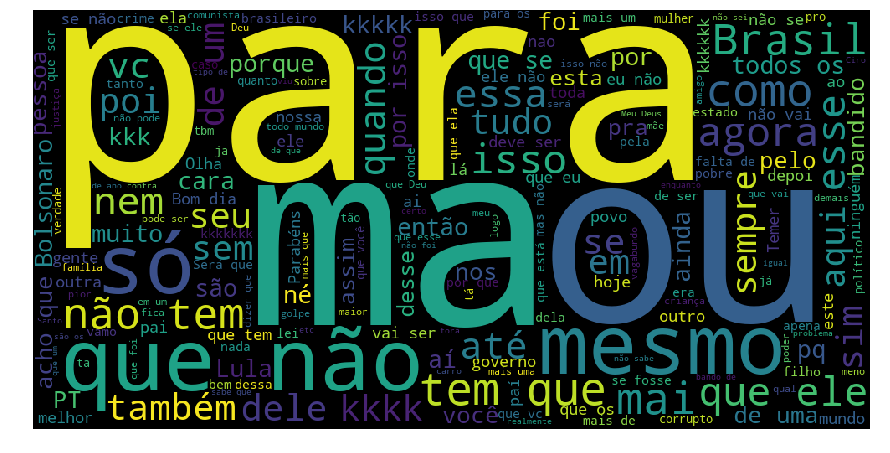

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(face.loc[:,'MENTION']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.figure(figsize=(15,8))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

In [105]:
bolsonaro = face_2.loc[face_2.MENTION.str.contains('([Bb]olsonaro)'),:].head().MENTION.str
from wordcloud import WordCloud
text = WordCloud(width = 1000, height = 500, stopwords=['para', 'até', 'esse', 'não', 'esse', 'tem', 'como']).process_text(''.join(bolsonaro.join(''), ))

#plt.figure(figsize=(15,8))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()
#text

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [83]:
#face_2.loc[face_2.SRC.str.contains('([Bb]olso)'),:].groupby('SRC').count()
#face_2.loc[face_2.SRC.str.contains('([Cc]iro)'),:].groupby('SRC').count()
#face_2.loc[face_2.SRC.str.contains('([Ll]ula)'),:].groupby('SRC').count()
#face_2.loc[face_2.SRC.str.contains('([Mm]arina|[Ll]ula|[Bb]olso|[Cc]iro|[Dd]oria|alvarodias|[Hh]uck|[Tt]emer)'),:].groupby('SRC').count().METHOD.sum()

face.loc[
    face.MENTION.str.contains('([Mm]arina|[Ll]ula|[Bb]olsonaro|[Cc]iro\s?|[Dd][o]ria|[aA]lvaro\s?[dD]ias|[Hh]uck|[Tt]emer|Alckimin)') 
   |
   face.SRC.str.contains('([Mm]arina|[Ll]ula|[Bb]olso|[Cc]iro\s?|[Dd]oria|alvarodias|[Hh]uck|[Tt]emer|Alckimin)') 
    ,:].groupby('SRC').count().sort_values('ID', ascending=False).ID


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()


SRC
ad.alvarodias                          2242
jairbolsonaropresidente2018Oficial     1922
cirogomeszueiro                        1257
jairmessias.bolsonaro                  1164
TimeCiroGomes                           989
oCiroGomes                              921
SomostodosJairMessiasBolsonaro          709
cirogomesoficial                        691
Brasil247                               629
Veja                                    595
bolsonaros2                             535
estadao                                 463
jairomessiasbolsonaro                   462
marinasilva.oficial                     454
gauchazh                                420
UOL                                     367
jornaloglobo                            358
diariocatarinense                       346
Exame                                   305
g1                                      293
JairBolsonaroPresidente2                281
OPOVOOnline                             240
faclubedolulapresidente     

In [152]:
import nltk
nltk.download("stopwords")
texto = face.MENTION.str.lower().replace("[.,!?:...]", " ")
#texto.str.replace("[^A-Za-z]", " ")
#texto.str.replace("[.,!?:...]", " ")


[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>


# Questões:
**[Sobre pesquisas de opinião](http://www.uky.edu/AS/PoliSci/Peffley/pdf/473Measuring%20Public%20Opinion.pdf)**

* Quais são as palavras mais usadas nos comentários?
    **[Wordcloud](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781784390150/11/ch11lvl1sec71/creating-a-wordcloud)**
    **[Git Wordcloud](https://amueller.github.io/word_cloud/)**
* Quais são as palavras mais usadas nos comentários com avaliações negativas?
* Quais são as palavras mais usadas nos comentários com avaliações positivas?
* Distribuição das reações?

Papers:

[[1](https://pdfs.semanticscholar.org/fb9e/50c16a9ddd2caf983a731502ccc53344e113.pdf)] Exposure to ideologically diverse news and opinion on Facebook

[[2](http://www.uky.edu/AS/PoliSci/Peffley/pdf/473Measuring%20Public%20Opinion.pdf)] Methods of Measuring Public Opinion

[[3](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0184562)] Parsimonious data: How a single Facebook like predicts voting behavior in multiparty systems

[[4](http://minerandodados.com.br/index.php/2017/06/22/mineracao-de-textos-7-tecnicas/)] Text Mining